![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [1]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [7]:
# Load dữ liệu online bằng hàm read_csv của pandas
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
data=pd.read_csv(link,encoding = 'latin1')

In [8]:
# Print out First 5 rows from dataframe
# Your code here
# Dùng head để xuất ra số dòng đầu của dataframe
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [9]:
# Print out brief info
# Dùng info để xuất ra thông tin về các thuộc tính của dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [10]:
# Your code here
# Tính tổng giá trị null trong  cột
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [11]:
# List all NaN values
# xuất ra các hàng mà cột Description có giá trị nan
data[data['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/10 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/10 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/10 16:50,0.0,NaN,United Kingdom


In [12]:
# xuất ra các hàng mà cột CustomerID có giá trị nan
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


**Exclude negative Quatity entries**

In [13]:
# Xuất các giá trị mà cột Quantity chứa giá trị âm
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/10 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/10 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/10 12:38,4.25,17897.0,United Kingdom


**Exclude negative Price entries**

In [15]:
# Xuất các giá trị mà cột UnitPrice chứa giá trị âm
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [56]:
# Your code here
# Trích xuất dataframe mà country là United Kingdom
customer_UK=data[data['Country']=='United Kingdom']
# Sau đó đếm số lượng của từng CustomerID để biết số lượng order của khách hàng
# Khi đó số lượng này đã được sắp giảm dần nên ta chỉ cần lấy giá trị đầu tiên sẽ được người order nhiều nhất
customer_UK_highest=customer_UK['CustomerID'].value_counts().head(1)
print('The customer with the highest number of orders comes from the United Kingdom:')
customer_UK_highest

The customer with the highest number of orders comes from the United Kingdom:


17841.0    7983
Name: CustomerID, dtype: int64

**The customer with the highest money spent on purchases comes from Netherlands**

In [97]:
# tạo dataframe khác để đảm bảo các thao tác không làm ảnh hưởng tới data cũ
data1=data.copy()
# Thêm cột mới tính tổng tiền hóa đơn bằng cách lấy cột đơn giá nhân cột số lượng
data1['TotalPrice'] = data1['UnitPrice']*data1['Quantity']
# Rút trích các đối tượng mà dữ liệu cột Country là Netherlands
customer_NL=data1[data1['Country']=='Netherlands']
# Tiến hành groupby theo CustomerID và tính tổng từng cột để lấy đươc tổng hóa đơn mà khách hàng đó mua
customer_NL_money=(customer_NL.groupby('CustomerID').sum()).reset_index()
# Khi đã có tổng tiền hóa đơn của mỗi khách hàng ta thực hiện sort theo thứ tự giảm dần để chọn ra người mua hàng cao nhất
customer_NL_higestmoney=customer_NL_money.sort_values(by=['TotalPrice'], ascending=False).head(1)
print('The customer with the highest money spent on purchases comes from Netherlands')
customer_NL_higestmoney

The customer with the highest money spent on purchases comes from Netherlands


,CustomerID,Quantity,UnitPrice,TotalPrice
8,14646.0,196719,5400.21,279489.02


**On which year had the highest sales?**

In [96]:
# Your code here
# tạo dataframe khác để đảm bảo các thao tác không làm ảnh hưởng tới data cũ
data1=data.copy()
invoiceYear=[]
# Thực hiện cắt chuỗi để lấy ra ngày của cột InvoiceDate
# Tách chuỗi bằng dấu khoảng trắng để lấy ngày/tháng/năm, sau đó tách dấu / để lấy năm
for i in data1['InvoiceDate']:
    b=i.split(' ')
    b=b[0]
    c=b.split('/')
    c=c[2]
    invoiceYear.append(c)
# Thêm cột mới vào dataframe là cột invoiceYear với giá trị bằng với cột vừa tách giá trị
data1['invoiceYear']=invoiceYear
# Tạo cột tổng tiền hóa đơn bằng số lượng nhân đơn giá
data1['TotalPrice'] = data1['UnitPrice']*data1['Quantity']
# groupby theo invoiceYear và tính tổng từng cột để lấy ra tổng số tiền mỗi năm
year_money=(data1.groupby('invoiceYear').sum()).reset_index()
# Sắp xếp tổng tiền giảm dần để lấy được năm bán hàng cao nhất
year_money_higest=year_money.sort_values(by=['TotalPrice'], ascending=False).head(1)
print('year had the highest sales')
year_money_higest


year had the highest sales


,invoiceYear,Quantity,UnitPrice,CustomerID,TotalPrice
1,11,4834222,2.238283e+06,5.802778e+09,8.998791e+06


**How many orders (per hour)?**

In [110]:
# tạo dataframe khác để đảm bảo các thao tác không làm ảnh hưởng tới data cũ
data1=data.copy()
invoicehour=[]
# Tiến hành tách chuỗi cột InvoiceDate để lấy ra giá trị giờ
# Tách từ dấu khoảng trắng sau đó lấy phần tử chứa giờ, rồi tách tiếp dấu : phân cách giờ phút để lấy giờ
for i in data1['InvoiceDate']:
    b=i.split(' ')
    b=b[1]
    c=b.split(':')
    c=c[0]
    invoicehour.append(c)
# Thêm cột giờ vào dataframe với giá trị bằng cột giờ vừa tách bên trên
data1['invoiceHour']=invoicehour
# Đếm số lượng hóa đơn theo giờ
hour_order=data1['invoiceHour'].value_counts()
hour_order

12    78709
15    77519
13    72259
14    67471
11    57674
16    54516
10    49037
9     34332
17    28509
8      8909
18     7974
19     3705
20      871
7       383
6        41
Name: invoiceHour, dtype: int64

**Make a plot about number of orders per hour**

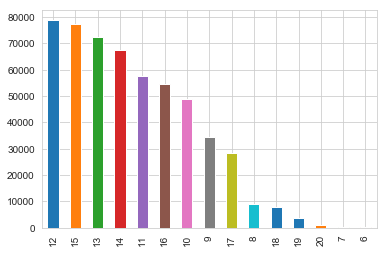

In [111]:
# Lấy kết quả số lượng hóa đơn theo giờ và vẽ biểu đồ dạng bar
hour_order.plot(kind='bar')

**How many orders (per month)?**

In [112]:
# tạo dataframe khác để đảm bảo các thao tác không làm ảnh hưởng tới data cũ
data1=data.copy()
invoiceMonth=[]
# Thực hiện cắt chuỗi để lấy ra ngày của cột InvoiceDate
# Tách chuỗi bằng dấu khoảng trắng để lấy ngày/tháng/năm, sau đó tách dấu / để lấy tháng
for i in data1['InvoiceDate']:
    b=i.split(' ')
    b=b[0]
    c=b.split('/')
    c=c[1]
    invoiceMonth.append(c)
# Thêm cột tháng vào dataframe có giá trị bằng cột tháng vừa tách bên trên
data1['invoiceMonth']=invoiceMonth
# Đếm số lượng hóa đơn theo tháng để dược số hóa đơn/tháng
month_order=data1['invoiceMonth'].value_counts()
month_order

8     24658
6     24182
7     22998
17    22805
5     22104
10    19946
4     19617
21    19244
20    19173
18    19129
11    18417
13    18270
9     18146
14    18085
23    17805
1     17531
28    17265
24    16888
2     16729
25    16232
22    16137
15    15690
16    15603
30    15415
27    15022
3     14495
12    14136
19    13181
29    11925
26    10563
31    10518
Name: invoiceMonth, dtype: int64

**Make a plot about number of orders per month**

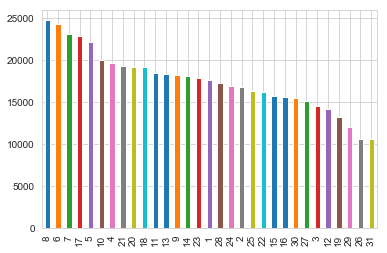

In [113]:
# Sử dụng kết quả tính số hóa đơn/tháng để vẽ biểu đồ dạng bar
month_order.plot(kind='bar')

**Top 10 items most sales**

In [119]:
# tạo dataframe khác để đảm bảo các thao tác không làm ảnh hưởng tới data cũ
data1=data.copy()
# groupby theo InvoiceNo rồi tính tổng các cột để lấy ra số lượng từng mặt hàng đã bán
count=data1.groupby('InvoiceNo').sum()
# tiến hành sort giảm dần để lấy ra top 10 món hàng có số lượng được bán nhiều nhất
top10=count.sort_values(by=['Quantity'], ascending=False).head(10)
top10

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
581483,80995,2.08,16446.0
541431,74215,1.04,12346.0
556917,15049,283.57,1713270.0
563076,14730,269.39,1742874.0
574941,14149,498.89,0.0
576365,13956,469.51,0.0
572035,13392,325.26,1830750.0
567423,12572,36.77,209400.0
578841,12540,0.00,13256.0


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

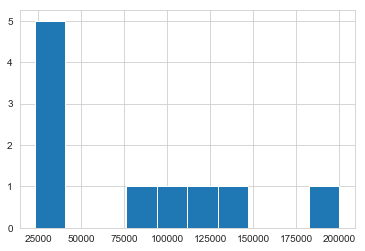

In [124]:
# Your code here
# Rút trích các khách hàng mà không đến từ United Kingdom
data1=data[data['Country']!='United Kingdom']
# Tiến hành groupby theo Country để lấy số lượng món hàng đã bán cho từng nước
count=data1.groupby('Country').sum()
# Sắp xếp Quantity để lấy ra top 10 quốc gia có số lượng được bán cao nhất
top10=count.sort_values(by=['Quantity'], ascending=False).head(10)
# vẽ biểu đồ histogram thể hiện 10 quốc gia tiêu thụ nhiều hàng nhất
plt.hist(top10['Quantity'], bins=10)
plt.show()
# What can you tell about this?

### You are awesome!!